### Starting out with pandas ###

In this code snippet we read the csv's to store each year's information in a `pandas` DataFrame in order to extract what we want. The name of the variable comes from the student, which in portuguese is written as *"aluno"* or *"discente"*.

These are the python packages we will need. `pandas` for manupulation and analysis of the `csv` files, `matplotlib` and `seaborn` to generate graphics to visualize the results. 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Right after, the first thing we do is read each `csv` file and store them in a `pandas` DataFrame. We kept 2017 and 2018 out of this for two reasons:

1. The 2017 `csv` said that all of the students had entered the university in 2009, which makes no sense;
2. Since we're still in 2018, the 2018 file is incomplete, so it's result would just make it harder to analyze the graphics.

In [45]:
dis09 = pd.read_csv('../res/discentes-2009.csv', sep=';', encoding='utf8')
dis10 = pd.read_csv('../res/discentes-2010.csv', sep=';', encoding='utf8')
dis11 = pd.read_csv('../res/discentes-2011.csv', sep=';', encoding='utf8')
dis12 = pd.read_csv('../res/discentes-2012.csv', sep=';', encoding='utf8')
dis13 = pd.read_csv('../res/discentes-2013.csv', sep=';', encoding='utf8')
dis14 = pd.read_csv('../res/discentes-2014.csv', sep=';', encoding='utf8')
dis15 = pd.read_csv('../res/discentes-2015.csv', sep=';', encoding='utf8')
dis16 = pd.read_csv('../res/discentes-2016.csv', sep=';', encoding='utf8')
dis17 = pd.read_csv('../res/discentes-2017.csv', sep=';', encoding='utf8')
dis18 = pd.read_csv('../res/discentes-2018.csv', sep=';', encoding='utf8')

We only want to work with graduation students, so that's what this code is doing. Also, there are some columns that do not have much use for use, so we store their id's in a variable (`drop_cols`) and drop them from the DataFrame.

In [46]:
drop_cols = ['periodo_ingresso', 'forma_ingresso', 'tipo_discente', 'sigla_nivel_ensino', 'id_unidade_gestora', 'nome_unidade_gestora', 'forma_ingresso']

dis09 = dis09[dis09.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis10 = dis10[dis10.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis11 = dis11[dis11.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis12 = dis12[dis12.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis13 = dis13[dis13.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis14 = dis14[dis14.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis15 = dis15[dis15.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis16 = dis16[dis16.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis17 = dis17[dis17.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis18 = dis18[dis18.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)

Drop all the *NULL* or *NaN* (Not a Number) rows.

In [47]:
dis09.dropna(inplace=True)
dis10.dropna(inplace=True)
dis11.dropna(inplace=True)
dis12.dropna(inplace=True)
dis13.dropna(inplace=True)
dis14.dropna(inplace=True)
dis15.dropna(inplace=True)
dis16.dropna(inplace=True)
dis17.dropna(inplace=True)
dis18.dropna(inplace=True)

### Unite all the DataFrames into one  ###

Here we `concat` all of the DataFrames into a single one that contains only the cancelled students, as well as another DataFrame containing students that still have an active registration or have finished their courses.

In [48]:
dis_cancelled = pd.concat([dis09, dis10, dis11, dis12, dis13, dis14, dis15, dis16], ignore_index=True)
dis_cancelled = dis_cancelled[dis_cancelled.status == 'CANCELADO']
dis_cancelled = dis_cancelled[~dis_cancelled.matricula.duplicated()]
dis_cancelled = dis_cancelled.replace({'ADMINISTRAÇÃO -': 'ADMINISTRAÇÃO'})

dis_active = pd.concat([dis09, dis10, dis11, dis12, dis13, dis14, dis15, dis16], ignore_index=True)
dis_active = dis_active[dis_active.status != "CANCELADO"]
dis_active = dis_active[~dis_active.matricula.duplicated()]
dis_active = dis_active.replace({'ADMINISTRAÇÃO -': 'ADMINISTRAÇÃO'})

The next step is to read a file that contains all of the university graduate courses in UFRN, and store that in a variable to ??????????????????????????

In [49]:
courses = pd.read_csv('../res/cursos-ufrn.csv', sep=';', encoding='utf-8')
courses = courses[courses.nivel_ensino == 'GRADUAÇÃO']
courses.rename(columns={'nome': 'nome_curso'}, inplace=True)

In [50]:
column = ['unidade_responsavel'] + list(dis_cancelled.columns.values)
column_drop = ['modalidade_educacao', 'nivel_ensino', 'situacao_curso',
               'grau_academico', 'tipo_oferta', 'tipo_ciclo_formacao', 'turno', 'municipio',
               'data_funcionamento', 'codigo_inep', 'website', 'dou', 'id_coordenador', 'coordenador',
               'portaria_reconhecimento', 'convenio_academico', 'nome_curso']
merge_coursesdis= pd.merge(courses.drop(column_drop,axis=1), dis_cancelled, on='id_curso')
merge_coursesdis

,id_curso,area_conhecimento,campus,id_unidade_responsavel,unidade_responsavel,matricula,nome_discente,ano_ingresso,status,nivel_ensino,nome_curso,modalidade_educacao,id_unidade,nome_unidade
0,2000002,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009007e+09,ADSON ARACELI ALVES DANTAS,2009,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
1,2000002,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ALINNE STÉPHANIE COTA DE SÁ,2009,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
2,2000002,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009007e+09,ALRIANE SILVESTRE DA SILVA,2009,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
3,2000002,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ANA CAMILA DO NASCIMENTO JANUÁRIO,2009,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
4,2000002,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009007e+09,ANA JÚLIA NUNES DE ARAÚJO,2009,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
5,2000002,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009007e+09,ANDERSON KLÊNIO NASCIMENTO DA SILVA,2009,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
6,2000002,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ANDRÉ LUIZ BORBA DE FREITAS,2009,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
7,2000002,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ANDRESSA KROEFF PIRES,2009,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
8,2000002,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ANITA LUIZA BATISTA DE SANTANA,2009,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
9,2000002,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ARTHUR RODRIGUES SILVA,2009,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS


## Table with number of cancellations per year ##

This pivot table is used to store the amount of cancelled registrations in each course, each year.

In [51]:
pivot = pd.pivot_table(merge_coursesdis,
                       index='ano_ingresso',
                       columns='nome_curso',
                       aggfunc="count").fillna(0).astype(int)
pivot.reset_index(inplace=True)
pivot

ano_ingresso area_conhecimento                                  \
nome_curso                  ADMINISTRAÇÃO ADMINISTRAÇÃO PÚBLICA AGRONOMIA   
0                  2009                74                     0         0   
1                  2010                65                   247         0   
2                  2011                81                   194        25   
3                  2012                70                     0        15   
4                  2013               105                     0        21   
5                  2014               106                   115        26   
6                  2015                84                     0        15   
7                  2016                54                     0        11   

                                                                          \
nome_curso ANÁLISE E DESENVOLVIMENTO DE SISTEMAS ARQUITETURA E URBANISMO   
0                                              0                       6   
1                                              0                       5   
2                                              0                       4   
3                                              0                       4   
4                                             21                       7   
5                                             18                       6   
6                                             17                       4   
7                                             18                       4   

                                                                            \
nome_curso ARTES VISUAIS BIBLIOTECONOMIA BIOMEDICINA CIÊNCIA DA COMPUTAÇÃO   
0                     17              11          19                    36   
1                     19              12          28                    36   
2                     26              14          39                    43   
3                     18              14          30                    38   
4                     23              32          22                    19   
5                     21              24          27                     0   
6                     16              21          21                     0   
7                     12              22          15                     1   

              ...    unidade_responsavel                     \
nome_curso    ...              PEDAGOGIA PSICOLOGIA QUÍMICA   
0             ...                     52         14     176   
1             ...                     60         15     279   
2             ...                     58          9     130   
3             ...                    287          8     227   
4             ...                    106         11     155   
5             ...                    219         15     180   
6             ...                     64         10      83   
7             ...                     61         12      62   

                                                                             \
nome_curso QUÍMICA DO PETRÓLEO SERVIÇO SOCIAL SISTEMAS DE INFORMAÇÃO TEATRO   
0                           16             13                     36     13   
1                           17             16                     40     26   
2                           15             23                     38     18   
3                           10             13                     38     18   
4                           28             33                     25     15   
5                           43             39                     33      9   
6                           21             33                     25     12   
7                           19             27                     14      9   

                                                       
nome_curso TECNOLOGIA DA INFORMAÇÃO TURISMO ZOOTECNIA  
0                                 0      52        64  
1                                 0      58        67  
2                                 0      62        4

## Table with the amount each year's canceled entrants ###

This table is used to show the total of each year's cancelled registrations.

In [52]:
x = pd.pivot_table(merge_coursesdis,
                   index='ano_ingresso',
                   values='nome_curso',
                   aggfunc='count').fillna(0).astype(int).reset_index()
x.rename(columns={'nome_curso': 'amount'}, inplace=True)
x

,ano_ingresso,amount
0,2009,2866
1,2010,4047
2,2011,3596
3,2012,4330
4,2013,3923
5,2014,4349
6,2015,2552
7,2016,2151


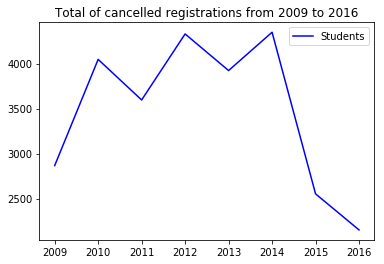

In [53]:
plt.plot(x['ano_ingresso'], 
         x['amount'], c='blue', label='Students')
plt.legend(loc='upper right')
plt.title('Total of cancelled registrations from 2009 to 2016')
plt.show()

## Cancelled students of some units ##

In this section we separate the number os cancelled students by unit, that is, by the unit responsible by the course.

#### Name of all units ####

In [54]:
merge_coursesdis.unidade_responsavel.unique().tolist()

['CENTRO DE CIÊNCIAS SOCIAIS APLICADAS',
 'CENTRO DE  ENSINO SUPERIOR DO SERIDÓ',
 'ESCOLA AGRÍCOLA DE JUNDIAÍ',
 'CENTRO DE TECNOLOGIA',
 'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES',
 'CENTRO DE BIOCIÊNCIAS',
 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA',
 'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
 'CENTRO DE CIÊNCIAS DA SAÚDE',
 'FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA',
 'ESCOLA DE SAÚDE',
 'ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE',
 'ESCOLA DE MÚSICA',
 'CENTRO DE EDUCAÇÃO',
 'INSTITUTO METROPOLE DIGITAL']

### Biomedical unit ###

In [55]:
biomedical = merge_coursesdis[merge_coursesdis.unidade_responsavel == "CENTRO DE CIÊNCIAS DA SAÚDE"]
biomedical.nome_curso.unique().tolist()

['EDUCAÇÃO FÍSICA',
 'ENFERMAGEM',
 'FARMÁCIA',
 'FISIOTERAPIA',
 'FONOAUDIOLOGIA',
 'GESTÃO EM SISTEMAS E SERVIÇOS DE SAÚDE',
 'MEDICINA',
 'NUTRIÇÃO',
 'ODONTOLOGIA']

In [56]:
biomedical.head()

,id_curso,area_conhecimento,campus,id_unidade_responsavel,unidade_responsavel,matricula,nome_discente,ano_ingresso,status,nivel_ensino,nome_curso,modalidade_educacao,id_unidade,nome_unidade
12039,85436676,Ciências da Saúde,NaN,441,CENTRO DE CIÊNCIAS DA SAÚDE,2.012008e+09,CARLOS EDUARDO TEIXEIRA DE LIMA,2012,CANCELADO,GRADUAÇÃO,EDUCAÇÃO FÍSICA,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
12040,85436676,Ciências da Saúde,NaN,441,CENTRO DE CIÊNCIAS DA SAÚDE,2.014067e+09,ANTONILDO LUCAS PINHEIRO DA SILVA,2014,CANCELADO,GRADUAÇÃO,EDUCAÇÃO FÍSICA,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
12041,85436676,Ciências da Saúde,NaN,441,CENTRO DE CIÊNCIAS DA SAÚDE,2.014067e+09,BRUNA KARLA DA SILVA FONSECA,2014,CANCELADO,GRADUAÇÃO,EDUCAÇÃO FÍSICA,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
12042,85436676,Ciências da Saúde,NaN,441,CENTRO DE CIÊNCIAS DA SAÚDE,2.014067e+09,DANIELY ALINY DA SILVA BARROS,2014,CANCELADO,GRADUAÇÃO,EDUCAÇÃO FÍSICA,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
12043,85436676,Ciências da Saúde,NaN,441,CENTRO DE CIÊNCIAS DA SAÚDE,2.014067e+09,JOSÉ ÍTALO SOARES SILVA,2014,CANCELADO,GRADUAÇÃO,EDUCAÇÃO FÍSICA,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE


#### Table with the amount of each year's canceled entrants on humanities unit ####

In [57]:
bio = pd.pivot_table(biomedical,
               index='ano_ingresso',
               values = 'nome_curso',
               aggfunc='count').fillna(0).astype(int).reset_index()
bio.rename(columns={'nome_curso': 'amount'}, inplace=True)
bio

,ano_ingresso,amount
0,2009,93
1,2010,166
2,2011,188
3,2012,446
4,2013,292
5,2014,348
6,2015,203
7,2016,166


#### Graphic with the amount of each year's cancelled students on humanities unit ####

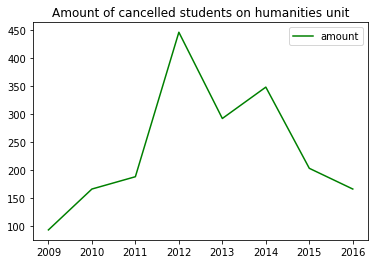

In [58]:
plt.plot(bio['ano_ingresso'], 
         bio['amount'], c='green', label='amount')
plt.legend(loc='upper right')
plt.title('Amount of cancelled students on humanities unit')
plt.show()

### Humanities unit ###

In [59]:
humanities = merge_coursesdis[merge_coursesdis.unidade_responsavel == "CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"]
humanities.head()

,id_curso,area_conhecimento,campus,id_unidade_responsavel,unidade_responsavel,matricula,nome_discente,ano_ingresso,status,nivel_ensino,nome_curso,modalidade_educacao,id_unidade,nome_unidade
1422,2000123,"Linguística, Letras e Artes",Campus Central,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",2.009013e+09,ADRIANA RODRIGUES DA SILVA,2009,CANCELADO,GRADUAÇÃO,ARTES VISUAIS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1423,2000123,"Linguística, Letras e Artes",Campus Central,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",2.009013e+09,ALICE TIBURCIO DE LIMA,2009,CANCELADO,GRADUAÇÃO,ARTES VISUAIS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1424,2000123,"Linguística, Letras e Artes",Campus Central,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",2.009013e+09,ANA BEATRIZ SOARES PIRES,2009,CANCELADO,GRADUAÇÃO,ARTES VISUAIS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1425,2000123,"Linguística, Letras e Artes",Campus Central,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",2.009013e+09,ANA CAROLINA GONÇALVES ROCHA,2009,CANCELADO,GRADUAÇÃO,ARTES VISUAIS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1426,2000123,"Linguística, Letras e Artes",Campus Central,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",2.009013e+09,ARANDÚ TESSAPORAM PINHEIRO,2009,CANCELADO,GRADUAÇÃO,ARTES VISUAIS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"


#### Table with the amount of each year's cancelled students on humanities unit ####

In [60]:
h = pd.pivot_table(humanities,
               index='ano_ingresso',
               values = 'nome_curso',
               aggfunc='count').fillna(0).astype(int).reset_index()
h.rename(columns={'nome_curso': 'amount'}, inplace=True)
h

,ano_ingresso,amount
0,2009,619
1,2010,672
2,2011,567
3,2012,771
4,2013,615
5,2014,772
6,2015,348
7,2016,288


#### Graphic with the amount of each year's cancelled students on humanities unit ####

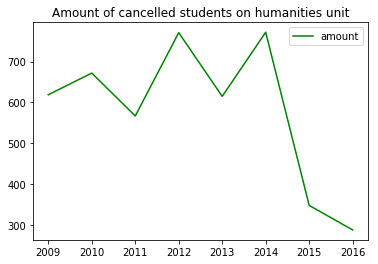

In [61]:
plt.plot(h['ano_ingresso'], 
         h['amount'], c='green', label='amount')
plt.legend(loc='upper right')
plt.title('Amount of cancelled students on humanities unit')
plt.show()

### Math and Science unit ###

In [62]:
math_science = merge_coursesdis[merge_coursesdis.unidade_responsavel == "CENTRO DE CIÊNCIAS EXATAS E DA TERRA"]
math_science.head()

,id_curso,area_conhecimento,campus,id_unidade_responsavel,unidade_responsavel,matricula,nome_discente,ano_ingresso,status,nivel_ensino,nome_curso,modalidade_educacao,id_unidade,nome_unidade
1925,2000013,Ciências Exatas e da Terra,Campus Central,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,2.009034e+09,AIRY IRÊRÊ PIMENTEL GOMES,2009,CANCELADO,GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
1926,2000013,Ciências Exatas e da Terra,Campus Central,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,2.009034e+09,AMANDA PRISCILLA ARAÚJO DA SILVA,2009,CANCELADO,GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
1927,2000013,Ciências Exatas e da Terra,Campus Central,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,2.009034e+09,ANANIAS RODRIGUES CHAVES NETO,2009,CANCELADO,GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
1928,2000013,Ciências Exatas e da Terra,Campus Central,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,2.009034e+09,ANDRÉ LUIZ DA SILVA SOARES,2009,CANCELADO,GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
1929,2000013,Ciências Exatas e da Terra,Campus Central,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,2.009034e+09,ANTONYONE INÁCIO PEREIRA DE OLIVEIRA,2009,CANCELADO,GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA


#### Table with the amount of each year's cancelled students on 'math and science' unit ####

In [63]:
m = pd.pivot_table(math_science,
               index='ano_ingresso',
               values = 'nome_curso',
               aggfunc='count').fillna(0).astype(int).reset_index()
m.rename(columns={'nome_curso': 'amount'}, inplace=True)
m

,ano_ingresso,amount
0,2009,656
1,2010,939
2,2011,553
3,2012,756
4,2013,566
5,2014,665
6,2015,335
7,2016,277


#### Graphic with the amount of each year's cancelled students on 'math and science' unit ####

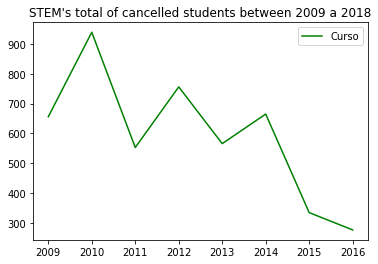

In [64]:
plt.plot(m['ano_ingresso'], 
         m['amount'], c='green', label='Curso')
plt.legend(loc='upper right')
plt.title('STEM\'s total of cancelled students between 2009 a 2018')
plt.show()

## Canceled students on IT ##

In [65]:
imd = merge_coursesdis[merge_coursesdis.nome_curso.str.contains('TECNOLOGIA DA INFORMAÇÃO')]
imd.head()

,id_curso,area_conhecimento,campus,id_unidade_responsavel,unidade_responsavel,matricula,nome_discente,ano_ingresso,status,nivel_ensino,nome_curso,modalidade_educacao,id_unidade,nome_unidade
26499,92127264,Ciências Exatas e da Terra,NaN,6069,INSTITUTO METROPOLE DIGITAL,2.013047e+09,ALESON BELO DA SILVA,2013,CANCELADO,GRADUAÇÃO,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
26500,92127264,Ciências Exatas e da Terra,NaN,6069,INSTITUTO METROPOLE DIGITAL,2.013042e+09,ALEXANDRE TADEU DE FIGUEIREDO AZEVEDO,2013,CANCELADO,GRADUAÇÃO,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
26501,92127264,Ciências Exatas e da Terra,NaN,6069,INSTITUTO METROPOLE DIGITAL,2.013021e+09,ALTEMAR ARIOSTENE SOLON,2013,CANCELADO,GRADUAÇÃO,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
26502,92127264,Ciências Exatas e da Terra,NaN,6069,INSTITUTO METROPOLE DIGITAL,2.013050e+09,ALVARO EDUARDO SILVA SOARES,2013,CANCELADO,GRADUAÇÃO,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
26503,92127264,Ciências Exatas e da Terra,NaN,6069,INSTITUTO METROPOLE DIGITAL,2.013020e+09,ALYSON DAVID DE CARVALHO LIMA,2013,CANCELADO,GRADUAÇÃO,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL


#### Tabel with the amount of cancelled students on IT between 2013 and 2018  ####

Detail: IT course started in 2013

In [66]:
y = pd.pivot_table(imd,
                   index='ano_ingresso',
                   values = 'nome_curso',
                   aggfunc='count').fillna(0).astype(int).reset_index()
y.rename(columns={'nome_curso': 'amount'}, inplace=True)
y

,ano_ingresso,amount
0,2013,153
1,2014,163
2,2015,134
3,2016,111


#### Graphic with the amount of cancelled students on IT between 2013 and 2018 ####

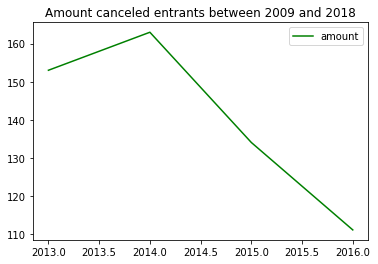

In [67]:
plt.plot(y['ano_ingresso'], 
         y['amount'], c='green', label='amount')
plt.legend(loc='upper right')
plt.title('Amount canceled entrants between 2009 and 2018')
plt.show()

## Comparing Charts ##

First we compare each unit.

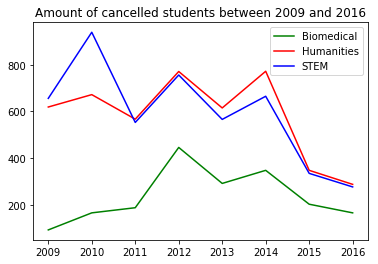

In [68]:
plt.plot(bio['ano_ingresso'], 
         bio['amount'], c='green', label='Biomedical')
plt.plot(h['ano_ingresso'], 
         h['amount'], c='red', label='Humanities')
plt.plot(m['ano_ingresso'], 
         m['amount'], c='blue', label='STEM')
plt.legend(loc='upper right')
plt.title('Amount of cancelled students between 2009 and 2016')
plt.show()

Then we create a table with the total amount of non-cancelled students in each year.

In [69]:
active = pd.pivot_table(dis_active,
                        index='ano_ingresso',
                        values = 'nome_curso',
                        aggfunc='count').fillna(0).astype(int).reset_index()
active.rename(columns={'nome_curso': 'amount'}, inplace=True)

And use that last table to create a graph comparing the amount of cancelled and active students.

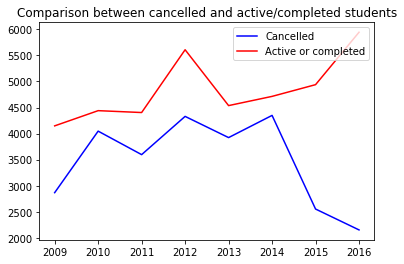

In [70]:
plt.plot(x['ano_ingresso'], 
         x['amount'], c='blue', label='Cancelled')
plt.plot(active['ano_ingresso'], 
         active['amount'], c='red', label='Active or completed')
plt.legend(loc='upper right')
plt.title('Comparison between cancelled and active/completed students')
plt.show()